# Project Title and Objectives

## TexasSalaryPrediction

## Objectives

The objective of this project is to analyze Texas State Government and build a model that predicts payroll information

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

load the data

In [2]:
df=pd.read_csv('salary.csv')
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


## 1.>Data analysis report

Basic checks

In [3]:
df.shape

(149481, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [5]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


#### Finding the missing values and handling them

In [6]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values

multiple_full_time_jobs    149467
summed_annual_salary       149465
hide_from_search           149465
combined_multiple_jobs     149384
duplicated                 149338
MI                              0
FIRST NAME                      0
LAST NAME                       0
AGENCY NAME                     0
AGENCY                          0
CLASS CODE                      0
ETHNICITY                       0
CLASS TITLE                     0
HRS PER WK                      0
HRLY RATE                       0
EMPLOY DATE                     0
STATUS                          0
GENDER                          0
STATE NUMBER                    0
MONTHLY                         0
ANNUAL                          0
dtype: int64

##### Handling missing values

In [7]:
df.drop(columns=['multiple_full_time_jobs','summed_annual_salary','hide_from_search','combined_multiple_jobs','duplicated'],inplace=True)

In [8]:
df.shape

(149481, 16)

##### Drop the columns

Now we need to drop the columns which are not required in training the data.


These columns need to be dropped because they create disturbance in model creation

In [9]:
df.drop(columns=['LAST NAME','FIRST NAME','MI','MONTHLY','STATE NUMBER'],inplace=True)

#### visualising the data by using graphs

<Axes: xlabel='ANNUAL', ylabel='Count'>

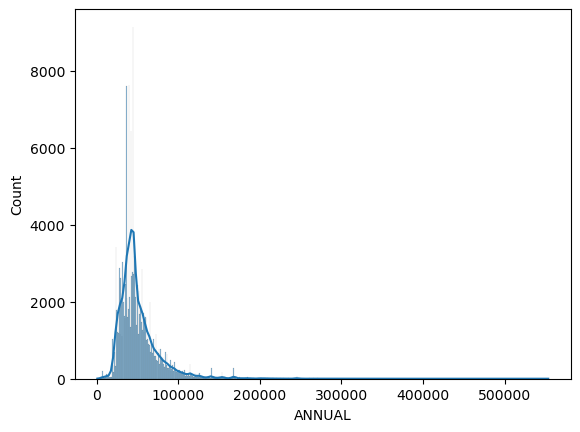

In [10]:
sns.histplot(df.ANNUAL,kde=True)

<Axes: xlabel='GENDER', ylabel='ANNUAL'>

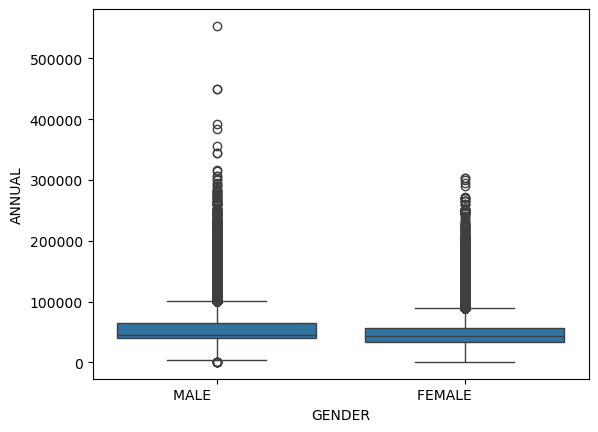

In [11]:
sns.boxplot(x=df.GENDER,y=df.ANNUAL)

<Axes: xlabel='EMPLOY DATE', ylabel='ANNUAL'>

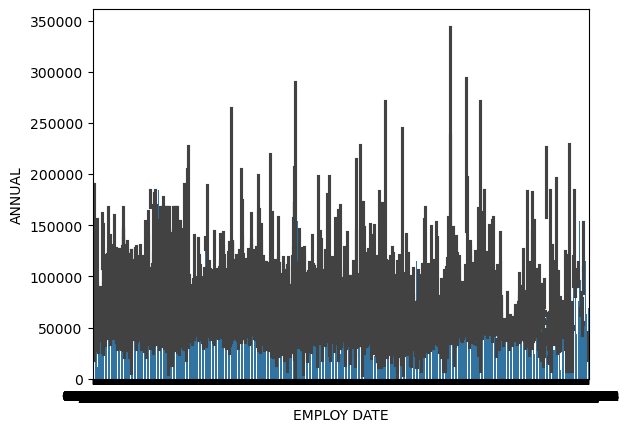

In [12]:
sns.barplot(x='EMPLOY DATE',y='ANNUAL',data=df)

In [13]:
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'])

In [14]:
df['YEAR'] = df['EMPLOY DATE'].dt.year

In [15]:
salary_over_time = df.groupby('YEAR')['ANNUAL'].mean()


This measures the trends of salary versus time

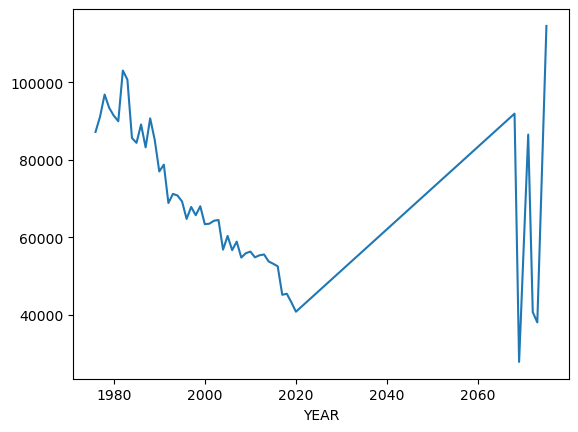

In [16]:
salary_over_time.plot()
plt.show()

<Axes: >

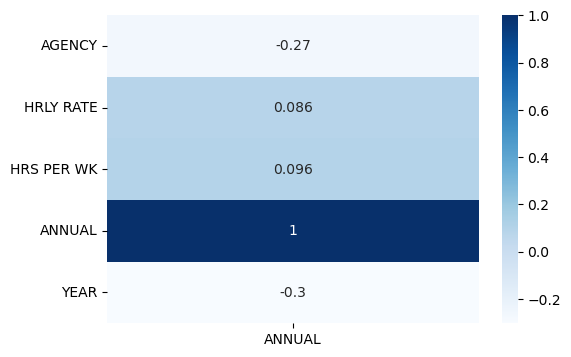

In [17]:
plt.figure(figsize=(6,4))
ann_corr=df.corr(numeric_only=True)['ANNUAL']
sns.heatmap(ann_corr.to_frame(),annot=True,cmap='Blues')

# 2.>Machine Learning Model

Now missing values are handled 
categorical data should be converted to numerical data by using encoding

##### Encoding

In [18]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['AGENCY NAME', 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER',
       'STATUS'],
      dtype='object')

As employee date and class code are not required for training we will drop it

In [19]:
df.drop(columns=['CLASS CODE','EMPLOY DATE'],inplace=True)

In [20]:
encoding_columns=df.select_dtypes(include='object').columns
encoding_columns

Index(['AGENCY NAME', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS'], dtype='object')

We are using label encoding 

In [21]:
le=LabelEncoder()
for col in encoding_columns:
    df[col]=le.fit_transform(df[col])

check whether all the categorical columns are converted to numerical or not

In [22]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

##### Now we have to split the data for training and testing

separate target variable from other columns

In [23]:
x=df.drop(columns=['ANNUAL'],axis=1)

In [24]:
y=df['ANNUAL']

Train-Test-Split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Linear Regression

##### Model Training

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)

##### Model Evaluation

MAE Error occured between actual value and predicted value

In [28]:
mae=mean_absolute_error(y_test,y_pred)
mae

14385.100514163554

MSE average of squared difference between actual value and predicted value

In [29]:
mse=mean_squared_error(y_test,y_pred)
mse

483940972.97806025

R2_score It defines how the salary is varying based on input features.
It explains how accurate the model is

In [30]:
r2=r2_score(y_test,y_pred)
r2

0.21651022914028806

#### Random Forest

##### Model Training

In [31]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
y_pred=rf.predict(x_test)

##### Model Evaluation

MAE

In [33]:
mae=mean_absolute_error(y_test,y_pred)
mae

3053.7206486936534

MSE

In [34]:
mse=mean_squared_error(y_test,y_pred)
mse

42193826.34727897

R2

In [35]:
r2=r2_score(y_test,y_pred)
r2

0.9316891249503215

#### Feature importance

In [36]:
feature_vs_annual=pd.DataFrame({'feature':x_train.columns,'annual':lr.coef_}).sort_values(by='annual',ascending=False)
feature_vs_annual

,feature,annual
4,GENDER,5731.622087
5,STATUS,2895.120762
3,ETHNICITY,2143.964894
7,HRS PER WK,1544.005250
6,HRLY RATE,227.214572
2,CLASS TITLE,0.604825
1,AGENCY NAME,-23.234685
0,AGENCY,-38.304751
8,YEAR,-996.024401


##### corr between features and annual

In [37]:
corr=df.corr(numeric_only=True)['ANNUAL'].sort_values(ascending=False)
corr

ANNUAL         1.000000
STATUS         0.183917
ETHNICITY      0.170107
GENDER         0.129265
HRS PER WK     0.096041
HRLY RATE      0.086291
CLASS TITLE    0.085747
AGENCY NAME   -0.085757
AGENCY        -0.266452
YEAR          -0.303480
Name: ANNUAL, dtype: float64

# 3.A>Outliers in salaries

Text(0.5, 1.0, 'Salary Outliers')

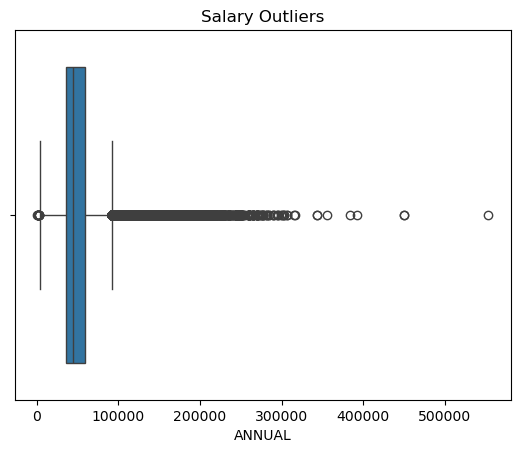

In [38]:
sns.boxplot(x=df.ANNUAL)
plt.title("Salary Outliers")
          

Employees with high annual income are considered as outliers.
Those one who are in the higher positions

In [39]:
Q1=df['ANNUAL'].quantile(0.25)
Q3=df['ANNUAL'].quantile(0.75)

In [40]:
IQR=Q3-Q1

In [41]:
IQR

np.float64(22151.64)

In [42]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [43]:
outliers=df[(df["ANNUAL"]<lower_bound) | (df['ANNUAL']>upper_bound)]
outliers.head(10)

,AGENCY,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,ANNUAL,YEAR
0,241,17,711,5,1,8,75.9615,29.0,114549.84,1988
2,241,17,711,5,1,8,75.9615,29.0,114549.84,2020
5,302,54,399,3,0,0,0.0000,40.0,154788.00,2020
7,510,82,399,5,1,0,0.0000,40.0,120000.00,2020
36,101,67,750,5,0,7,0.0000,40.0,96000.00,2010
38,101,67,750,5,1,7,0.0000,40.0,111000.00,2017
39,101,67,750,5,1,7,0.0000,40.0,133800.00,2010
41,101,67,765,3,0,8,0.0000,30.0,96000.00,2019
42,101,67,750,5,1,7,0.0000,40.0,129999.96,2016
43,101,67,750,5,1,7,0.0000,40.0,105000.00,2014


# 3.B>Comparing salaries which role have which kind of salaries

Text(0.5, 1.0, 'Salries based on roles')

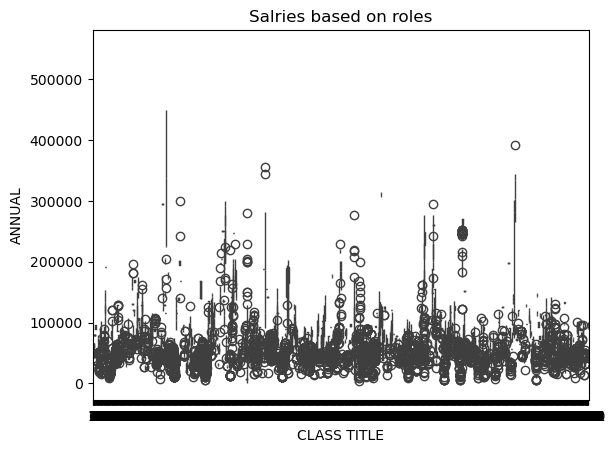

In [44]:
sns.boxplot(x='CLASS TITLE',y='ANNUAL',data=df)
plt.title('Salries based on roles')

In [45]:
role_vs_salary=df.groupby('CLASS TITLE')['ANNUAL'].mean().sort_values(ascending=False)
pd.DataFrame(role_vs_salary).head()

,ANNUAL
CLASS TITLE,
214,553500.00
400,450000.00
1053,384375.00
1211,319000.00
495,316116.96


In [46]:
dept_vs_salary=df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending=False)
pd.DataFrame(dept_vs_salary).head()

,ANNUAL
AGENCY NAME,
17,138298.202091
82,120000.000000
110,117943.637746
12,117206.127273
36,112452.993000


# 3.C>Salary changing over time

Salary change over time could not be analyzed because the employment date column was removed during data preprocessing for model training.
As a result, the dataset does not contain time-based information required to track salary trends over different years.

Salary change over time was not analyzed because the date column was dropped during preprocessing.

But before Preprocessing it is analyzed in visualisation

# Model Comparision Report

# Challenges Faced